In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

import vrlatency as vrl

%matplotlib tk

Set the path tos ave stuff

In [2]:
path_data = "../../data/"
path_fig = "../../Figures/display/"

os.chdir(path_data)

In [3]:
filenames = []
for ind, filename in enumerate(glob.glob('*.csv')):
    exp_type = filename.split('_')[0]
    if exp_type == 'tracking':
        filenames.append(filename)
        print(filename.split('_')[0])

tracking
tracking


In [4]:
filename = filenames[-1]
filename

'tracking_20181003_193319.csv'

In [41]:
dfd = vrl.read_csv(filename)
dfd.tail()

,Trial,Time,RigidBody_Position,LED_Position
105411,1001,167.027963,1.049326,R
105412,1001,167.028960,1.049319,R
105413,1001,167.029954,1.049319,R
105414,1001,167.030945,1.049319,R
105415,1001,167.031947,1.049319,R


## Transformation

In [45]:
# time to millisecond
dfd['Time'] *= 1000
dfd['Sample'] = dfd.groupby('Trial').cumcount()
dfd['RigidBody_Position_norm'] = dfd['RigidBody_Position'] - dfd.RigidBody_Position.mean()

dfd['LED_State'] = dfd['RigidBody_Position_norm'].max()
dfd.loc[dfd['LED_Position'] == 'R', 'LED_State'] = dfd['RigidBody_Position_norm'].min()

dfd['Session'] = filename.split('.')[0]
dfd['Session'] = pd.Categorical(dfd['Session'])
dfd = dfd.reindex(['Session', 'Trial', 'Sample', 'Time', 'RigidBody_Position', 'RigidBody_Position_norm', 'LED_Position', 'LED_State'], axis=1)

dfl = vrl.get_tracking_latencies(dfd).to_frame().reset_index()
df = pd.merge(dfd, dfl, on='Trial')

df.head()

,Session,Trial,Sample,Time,RigidBody_Position,RigidBody_Position_norm,LED_Position,LED_State,TrackingLatency
0,tracking_20181003_193319,2,0,4.785723e+06,1.049319,-0.007022,L,0.007111,6356.792201
1,tracking_20181003_193319,2,1,4.786143e+06,1.049319,-0.007022,L,0.007111,6356.792201
2,tracking_20181003_193319,2,2,4.787107e+06,1.049319,-0.007022,L,0.007111,6356.792201
3,tracking_20181003_193319,2,3,4.788110e+06,1.049319,-0.007022,L,0.007111,6356.792201
4,tracking_20181003_193319,2,4,4.789135e+06,1.049319,-0.007022,L,0.007111,6356.792201


In [46]:
trial_init_time = dfd.groupby('Trial').Time.apply(lambda x: x.min()).values

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df.Time, df.RigidBody_Position_norm, c='k')
ax.plot(df.Time, df.LED_State, c='g')
ax.scatter(df.Time, df.RigidBody_Position_norm, c='k', alpha=.3)
ax.vlines(trial_init_time, *plt.gca().get_ylim(), 'r');

ax.set(xlabel='Time (ms)', ylabel='Rigid body position (cm)');

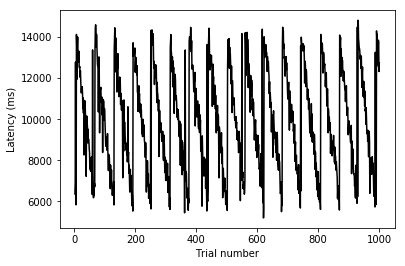

In [14]:
fig, ax = plt.subplots()

ax.plot(df.Trial, df.TrackingLatency.values, color='k')
ax.set(xlabel='Trial number', ylabel='Latency (ms)');

In [54]:
plt.hist(df.TrackingLatency.values, bins=60, color='k', alpha=.5);

Functions going into the analysis script for plotting

In [16]:
from matplotlib.gridspec import GridSpec

In [51]:
session = df.Session.values[0]
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(2, 2)
ax1, ax2, ax3 = plt.subplot(gs[0, :]), plt.subplot(gs[1, 0]), plt.subplot(gs[1, 1])

ax1.plot(df.Time, df.RigidBody_Position_norm, c='k')
ax1.plot(df.Time, df.LED_State, c='g')
ax1.scatter(df.Time, df.RigidBody_Position_norm, c='k', alpha=.3)
ax1.vlines(trial_init_time, *plt.gca().get_ylim(), 'r');
ax1.set(xlabel='Time (ms)', ylabel='Rigid body position (cm)');

ax2.plot(df.Trial, df.TrackingLatency.values, color='k')
ax2.set(xlabel='Trial number', ylabel='Latency (ms)');